Importing librearies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


# Abstract

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

Data Source

This data contains 8807 rows and 12 columns

Loading the dataset

In [2]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 # Understadning, Wrangling and Cleaning Data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


First we will check if this dataset have any duplicate values

In [4]:
df.duplicated().sum()

0

this dataset has no duplicate values


First we examine null values before continuing with analysis

In [5]:
#checking for nullvalues
null=pd.DataFrame({'Null Values':df.isna().sum(),'Percentage of Null Values':((df.isna().sum())/(df.shape[0])*(100))})
null

,Null Values,Percentage of Null Values
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


As we can see that directors columns has about 30% and cast have around 9.36% null values we can replace it by "NA"
but Country has around 9.43% rating has 4 and duration has 3 null values which are important for analysis purpose 
so we will create a new data set having no null values in this columns 

In [6]:
#replacing all NaN values in 'director' and 'cast' with NA
df.fillna({'cast':'NA'}, inplace=True)
df.fillna({'director':'Na'},inplace=True)
df.fillna({'country':'-'},inplace=True)
df.fillna({'rating':'-'},inplace=True)
df.fillna({'duration':'-'},inplace=True)




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
filter=(df.country=='-') | (df.rating=='-') | (df.duration=='-')
df[filter]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",-,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Na,NA,-,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",-,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",-,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Na,NA,-,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",-,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,-,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,Na,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",-,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,Na,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",-,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [9]:
df1=df[~filter]

In [10]:
netflix_shows = df1[df1['type'] == 'TV Show'].copy()

In [11]:
netflix_movies = df1[df1['type'] == 'Movie'].copy()

df1 is dataset where all important values are not null

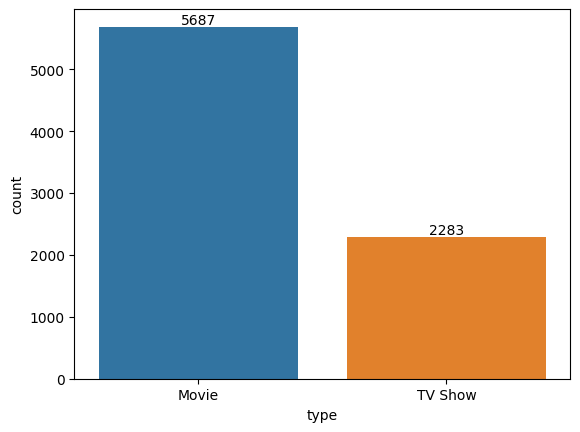

In [12]:
ax=sns.countplot(df1,x='type')
for bars in ax.containers:
    ax.bar_label(bars)

# Movie analysis

Which Months has the least amount of content

In [13]:
netflix_date=netflix_movies[['date_added']].dropna()
netflix_date.isnull().sum()

date_added    0
dtype: int64

In [14]:
netflix_date

,date_added
0,"September 25, 2021"
7,"September 24, 2021"
9,"September 24, 2021"
12,"September 23, 2021"
24,"September 21, 2021"
...,...
8801,"March 9, 2016"
8802,"November 20, 2019"
8804,"November 1, 2019"
8805,"January 11, 2020"


In [15]:
netflix_date['Year']=netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['Month']=netflix_date['date_added'].apply(lambda x:x.lstrip().split(' ')[0])
netflix_date

,date_added,Year,Month
0,"September 25, 2021",2021,September
7,"September 24, 2021",2021,September
9,"September 24, 2021",2021,September
12,"September 23, 2021",2021,September
24,"September 21, 2021",2021,September
...,...,...,...
8801,"March 9, 2016",2016,March
8802,"November 20, 2019",2019,November
8804,"November 1, 2019",2019,November
8805,"January 11, 2020",2020,January


In [16]:
netflix_date.sort_values(by=['Year','Month'],)

,date_added,Year,Month
5957,"January 1, 2008",2008,January
5956,"May 5, 2009",2009,May
5955,"November 18, 2009",2009,November
7370,"November 1, 2010",2010,November
5954,"May 17, 2011",2011,May
...,...,...,...
176,"September 1, 2021",2021,September
177,"September 1, 2021",2021,September
178,"September 1, 2021",2021,September
179,"September 1, 2021",2021,September


In [17]:
month_order=['January', 'February','March','April', 'May','June', 
             'July', 'August', 'September','October','November', 'December']

In [18]:
movie_count = netflix_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T
movie_count

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15.0,57.0,103.0,110.0,147.0,92.0
February,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,9.0,65.0,60.0,102.0,69.0,62.0
March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,85.0,135.0,114.0,86.0,66.0
April,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,65.0,86.0,110.0,124.0,110.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0,62.0,66.0,83.0,96.0,70.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,11.0,64.0,49.0,115.0,110.0,89.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,45.0,124.0,96.0,99.0,101.0
August,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,22.0,70.0,128.0,81.0,76.0,91.0
September,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,22.0,71.0,78.0,83.0,108.0,89.0


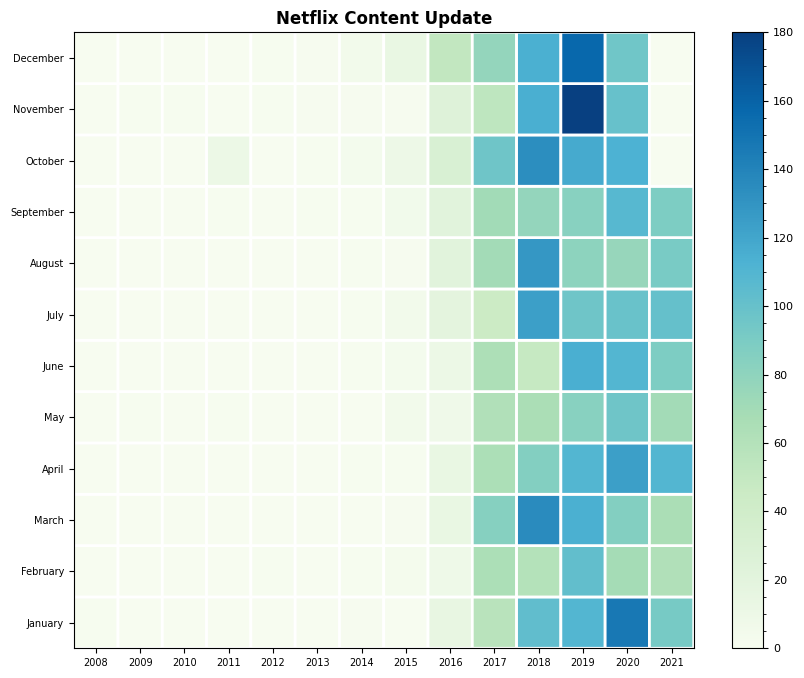

In [19]:
plt.figure(figsize=(10,8),dpi=100)
plt.pcolor(movie_count,cmap='GnBu',edgecolors='white',linewidths=2)
plt.xticks(np.arange(0.5,len(movie_count.columns),1),movie_count.columns,fontsize=7)
plt.yticks(np.arange(0.5,len(movie_count.index),1),movie_count.index,fontsize=7)
plt.title('Netflix Content Update', fontsize = 12, fontweight = 'bold')
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize = 8)
cbar.ax.minorticks_on()
plt.show()

may month has least contents throught years

Analyzing movie rating

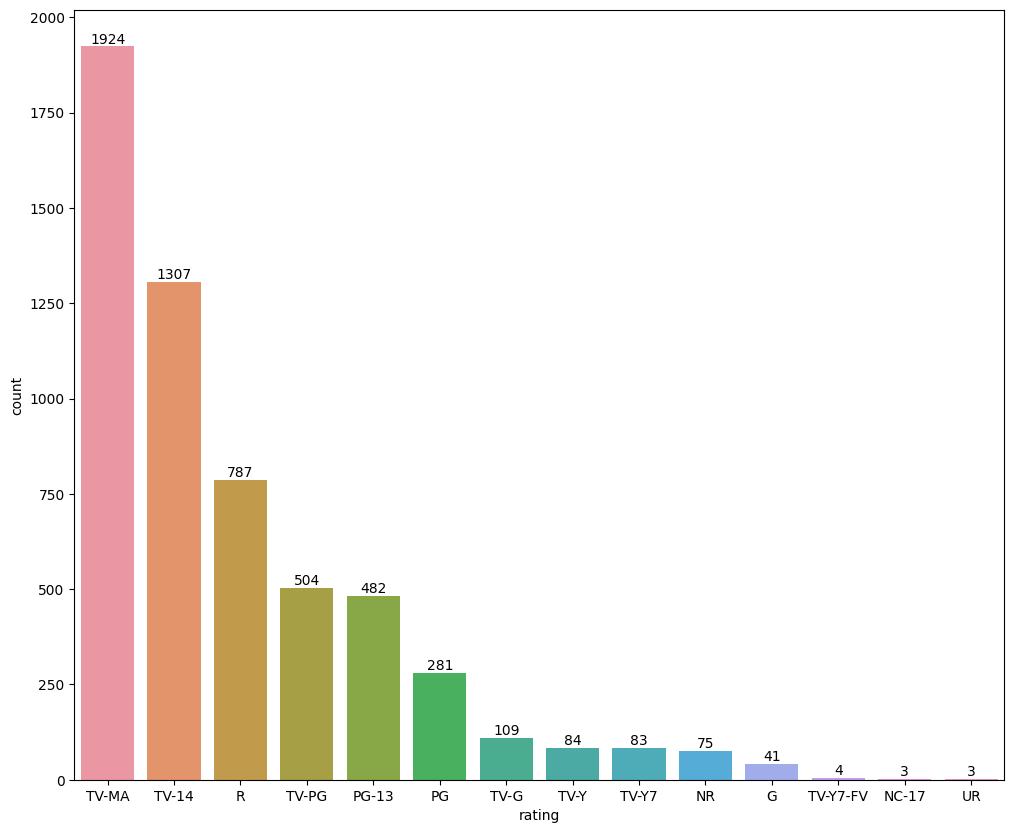

In [20]:
plt.figure(figsize=(12,10))
ax=sns.countplot(netflix_movies,x='rating',order=netflix_movies['rating'].value_counts().index[0:15])
for bars in ax.containers:
    ax.bar_label(bars)

TV-MA - The largest group. This rating is given for films intended for adult audiences only.

TV-14 - The second largest group. The content of the film with this rating is not suitable for children under 14 years of age.

R - The film is not suitable for children under 17 years of age.

Film realse year analysis(year wisw movie count)

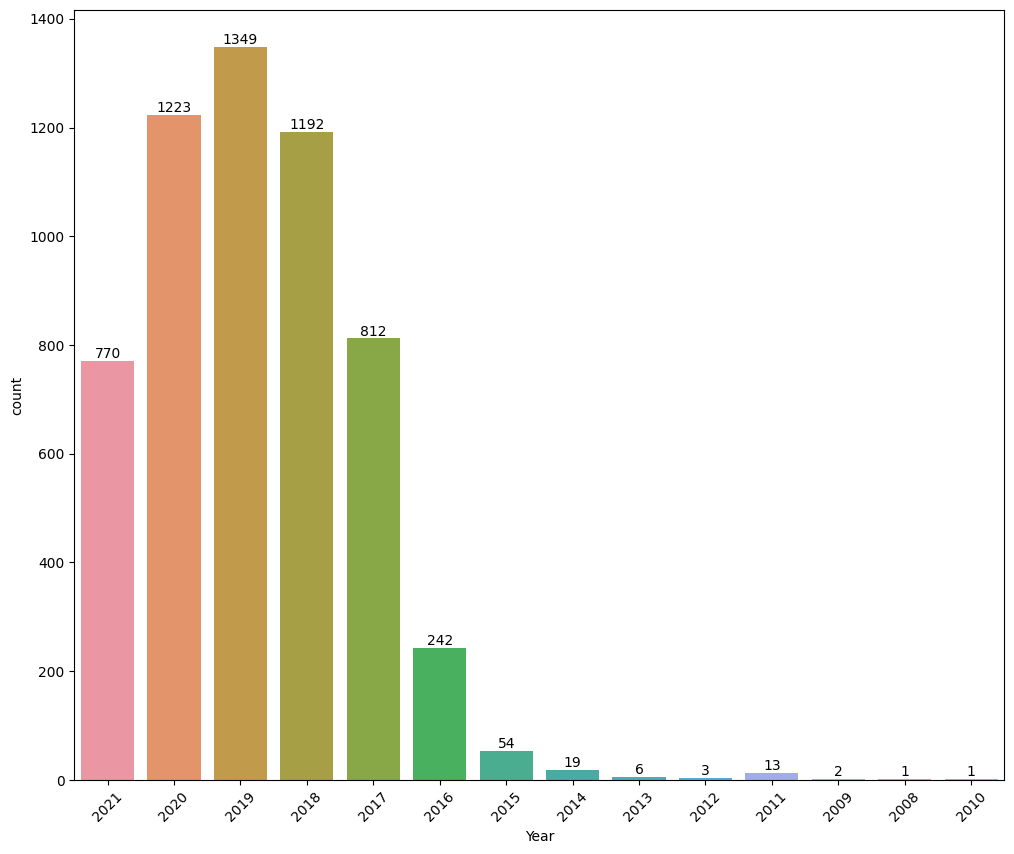

In [21]:
plt.figure(figsize=(12,10))
bx=sns.countplot(netflix_date,x='Year')
bx.set_xticklabels(bx.get_xticklabels(), rotation=45)
for bars in bx.containers:
    bx.bar_label(bars)


The most movies were realsed in 2019

which are top 10 countries which produce most movies

In [22]:
a=netflix_movies.groupby(by='country',as_index=False)['title'].count().sort_values(by='title',ascending=False).head(10)
a.rename(columns={"country":"country","title":"count"},inplace=True)
a

,country,count
525,United States,2055
218,India,893
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
428,Turkey,76
278,Japan,76


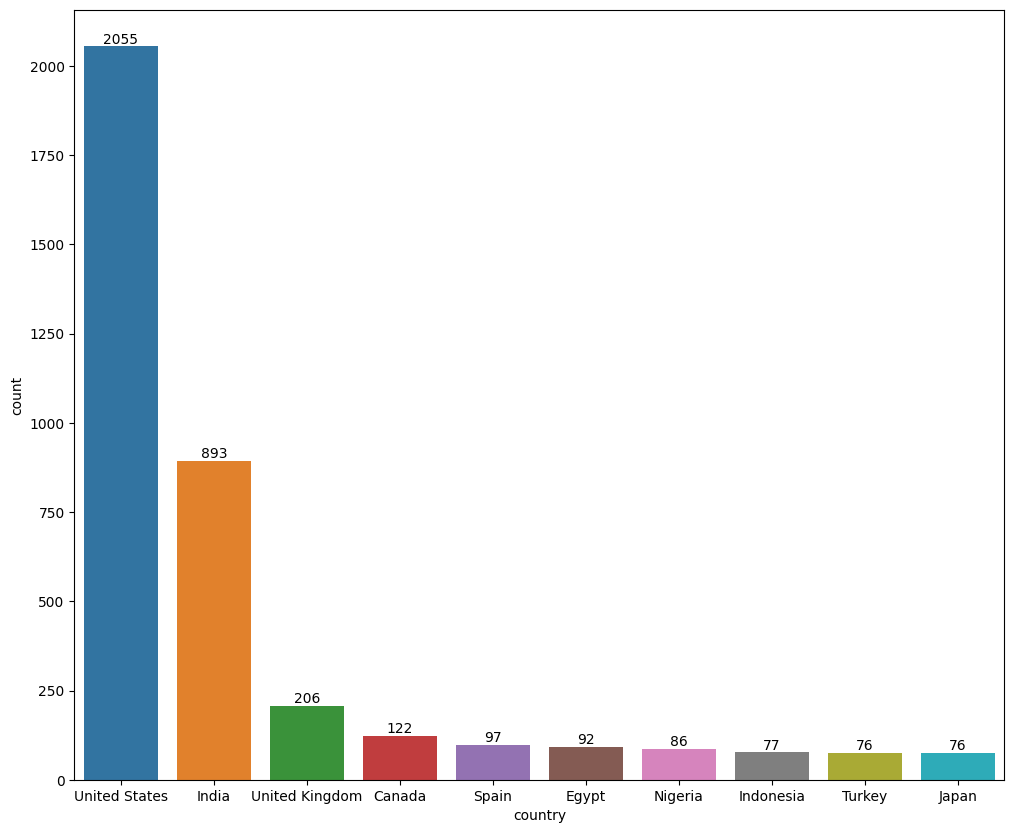

In [23]:
plt.figure(figsize=(12,10))
cx=sns.barplot(a,x='country',y='count')
for bars in cx.containers:
    cx.bar_label(bars)

Movie Duration Analysis

In [24]:
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'].str.replace(' min', ''), errors='coerce')

<Axes: xlabel='duration', ylabel='Density'>

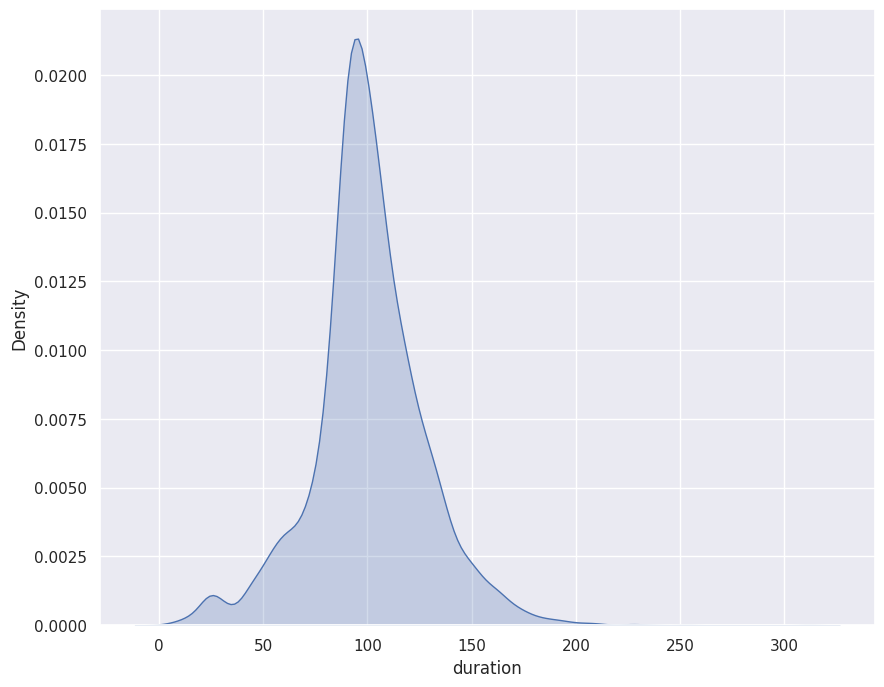

In [25]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,8))
sns.kdeplot(netflix_movies,x='duration',shade=True)

A large number of films last 75-120 minutes

genere analysis

In [26]:
from collections import Counter

In [27]:
genres = list(netflix_movies['listed_in'])
gen  = []
for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In [28]:
g = sorted(g.items(), key = lambda item: g[item[0]], reverse = True)
g

[('InternationalMovies', 2543),
 ('Dramas', 2316),
 ('Comedies', 1580),
 ('Action&Adventure', 817),
 ('Documentaries', 794),
 ('IndependentMovies', 745),
 ('RomanticMovies', 588),
 ('Thrillers', 549),
 ('Children&FamilyMovies', 535),
 ('HorrorMovies', 340),
 ('Music&Musicals', 328),
 ('Stand-UpComedy', 311),
 ('Sci-Fi&Fantasy', 242),
 ('SportsMovies', 201),
 ('ClassicMovies', 115),
 ('LGBTQMovies', 97),
 ('CultMovies', 70),
 ('AnimeFeatures', 63),
 ('Faith&Spirituality', 63),
 ('Movies', 31)]

In [29]:
genre_names = [name for name , value in g]
genre_names
genre_value=[value for name,value in g]
genre_value

[2543,
 2316,
 1580,
 817,
 794,
 745,
 588,
 549,
 535,
 340,
 328,
 311,
 242,
 201,
 115,
 97,
 70,
 63,
 63,
 31]

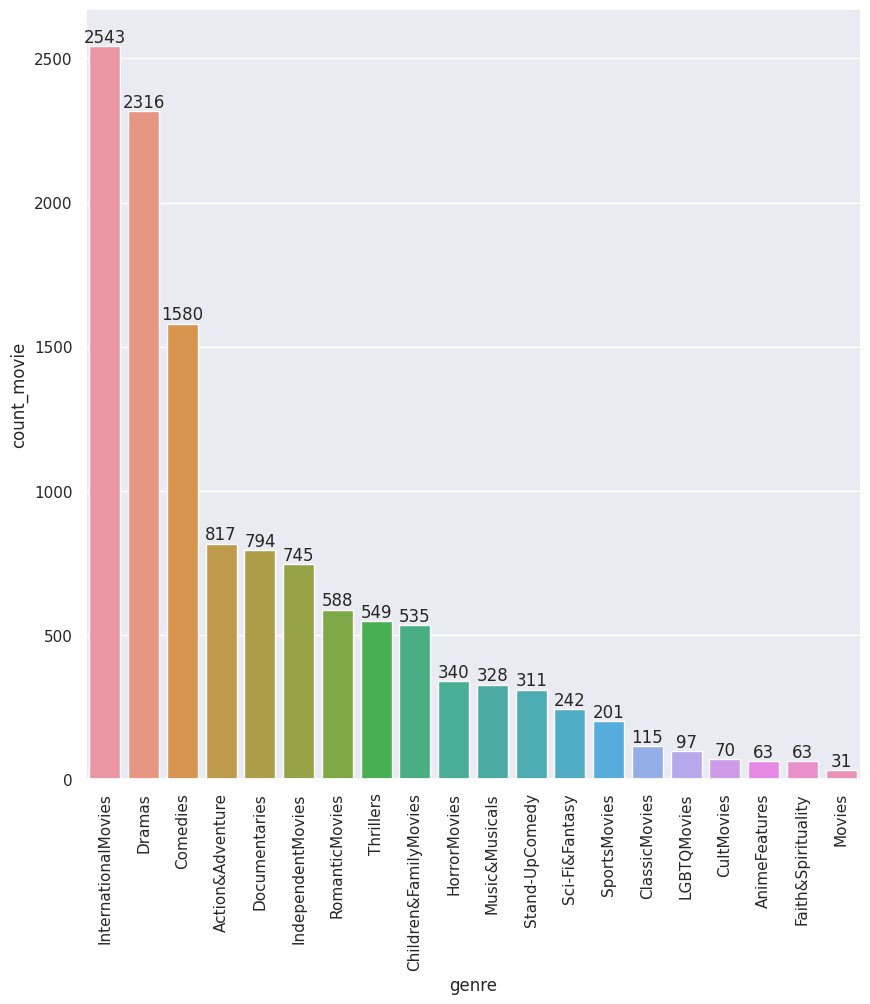

In [30]:
plt.figure(figsize=(10,10))
dx=sns.barplot(x=genre_names,y=genre_value)
dx.set_xticklabels(genre_names,rotation=90)
dx.set_ylabel('count_movie')
dx.set_xlabel('genre')
for bars in dx.containers:
    dx.bar_label(bars)
plt.show()

International films, dramas and comedies - top genres

# shows analysis

In [31]:
netflix_shows.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      9
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [32]:
b=netflix_shows.groupby(by='country',as_index=False)['title'].count().sort_values(by='title',ascending=False).head(10)
b.rename(columns={"country":"country","title":"count"},inplace=True)
b

,country,count
160,United States,760
140,United Kingdom,213
83,Japan,168
120,South Korea,158
66,India,79
132,Taiwan,68
17,Canada,59
47,France,49
125,Spain,48
4,Australia,47


[Text(0, 0, 'United States'),
 Text(1, 0, 'United Kingdom'),
 Text(2, 0, 'Japan'),
 Text(3, 0, 'South Korea'),
 Text(4, 0, 'India'),
 Text(5, 0, 'Taiwan'),
 Text(6, 0, 'Canada'),
 Text(7, 0, 'France'),
 Text(8, 0, 'Spain'),
 Text(9, 0, 'Australia')]

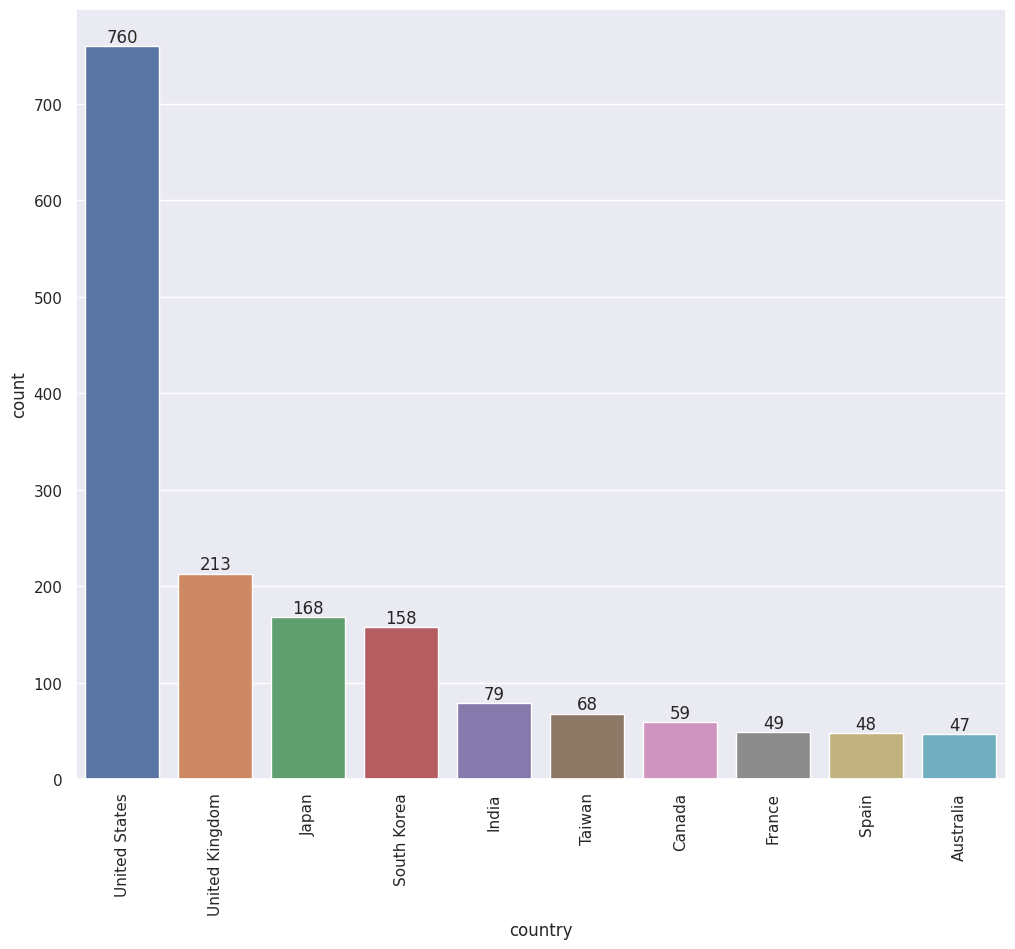

In [33]:
plt.figure(figsize=(12,10))
ex=sns.barplot(b,x='country',y='count')
for bars in ex.containers:
    ex.bar_label(bars)
ex.set_xticklabels(ex.get_xticklabels(), rotation=90)

we can see that united states have most numbers of shows

TV series with many seasons

In [34]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
4,Kota Factory,2 Seasons
8,The Great British Baking Show,9 Seasons
15,Dear White People,4 Seasons
17,Falsa identidad,2 Seasons
...,...,...
8780,Yo-Kai Watch,1 Season
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons


In [35]:
durations['no_of_season']=durations['duration'].str.replace(' Season','')
durations

,title,duration,no_of_season
1,Blood & Water,2 Seasons,2s
4,Kota Factory,2 Seasons,2s
8,The Great British Baking Show,9 Seasons,9s
15,Dear White People,4 Seasons,4s
17,Falsa identidad,2 Seasons,2s
...,...,...,...
8780,Yo-Kai Watch,1 Season,1
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2s
8796,Yunus Emre,2 Seasons,2s
8797,Zak Storm,3 Seasons,3s


In [36]:
durations['no_of_season']=durations['no_of_season'].str.replace('s','')
durations

,title,duration,no_of_season
1,Blood & Water,2 Seasons,2
4,Kota Factory,2 Seasons,2
8,The Great British Baking Show,9 Seasons,9
15,Dear White People,4 Seasons,4
17,Falsa identidad,2 Seasons,2
...,...,...,...
8780,Yo-Kai Watch,1 Season,1
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3


In [37]:
durations['no_of_season']=durations['no_of_season'].astype(int)

In [38]:
c=['title','no_of_season']
top=durations[c]
top

,title,no_of_season
1,Blood & Water,2
4,Kota Factory,2
8,The Great British Baking Show,9
15,Dear White People,4
17,Falsa identidad,2
...,...,...
8780,Yo-Kai Watch,1
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3


([<matplotlib.axis.XTick at 0x7b706b1c94b0>,
 [Text(0.0, 0, "Grey's Anatomy"),
  Text(1.0, 0, 'Supernatural'),
  Text(2.0, 0, 'NCIS'),
  Text(3.0, 0, 'Red vs. Blue'),
  Text(4.0, 0, 'COMEDIANS of the world'),
  Text(5.0, 0, 'Heartland'),
  Text(6.0, 0, 'Criminal Minds'),
  Text(7.0, 0, 'Trailer Park Boys'),
  Text(8.0, 0, 'Cheers'),
  Text(9.0, 0, 'Frasier'),
  Text(10.0, 0, 'Friends'),
  Text(11.0, 0, 'Stargate SG-1'),
  Text(12.0, 0, 'The Walking Dead'),
  Text(13.0, 0, "Dad's Army"),
  Text(14.0, 0, 'Shameless (U.S.)'),
  Text(15.0, 0, 'LEGO Ninjago: Masters of Spinjitzu'),
  Text(16.0, 0, 'Danger Mouse: Classic Collection'),
  Text(17.0, 0, 'Forensic Files'),
  Text(18.0, 0, 'American Horror Story'),
  Text(19.0, 0, 'Still Game')])

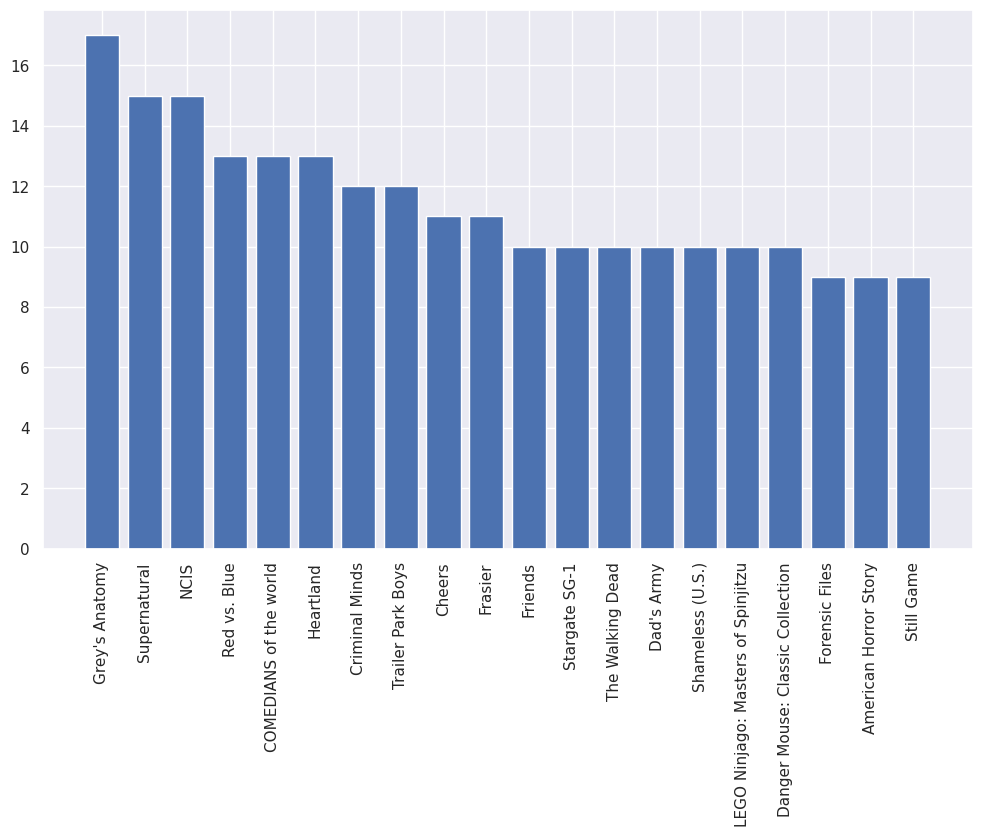

In [39]:
top=top.sort_values(by='no_of_season',ascending=False)
top20=top[0:20]
plt.figure(figsize = (12,7))
fx=plt.bar(top20['title'], top20['no_of_season'])
plt.xticks(top20['title'], rotation= 90)



Fewest number of seasons

In [40]:
bottom=top.sort_values(by='no_of_season')
bottom20=bottom[0:20]
bottom20

,title,no_of_season
1200,Waffles + Mochi,1
3294,Greatest Events of WWII in Colour,1
3274,La Robe De Mariee Des Cieux,1
3277,My Sassy Girl,1
3279,The Club,1
3281,The Stranded,1
2098,Emily's Wonder Lab,1
2096,Million Dollar Beach House,1
3286,My Dear Warrior,1
3287,Maradona in Mexico,1


Genre Analysis

In [41]:
netflix_shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
4       International TV Shows, Romantic TV Shows, TV ...
8                            British TV Shows, Reality TV
15                                 TV Comedies, TV Dramas
17      Crime TV Shows, Spanish-Language TV Shows, TV ...
                              ...                        
8780                               Anime Series, Kids' TV
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, Length: 2283, dtype: object

In [42]:
genres = list(netflix_shows['listed_in'])
gen = []
for i in genres :
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In [43]:
g = sorted(g.items(), key = lambda item: g[item[0]], reverse = True)
g

[('InternationalTVShows', 1127),
 ('TVDramas', 663),
 ('TVComedies', 500),
 ('CrimeTVShows', 421),
 ("Kids'TV", 369),
 ('Docuseries', 330),
 ('RomanticTVShows', 299),
 ('BritishTVShows', 237),
 ('RealityTV', 205),
 ('TVAction&Adventure', 153),
 ('AnimeSeries', 153),
 ('Spanish-LanguageTVShows', 145),
 ('KoreanTVShows', 136),
 ('TVMysteries', 92),
 ('Science&NatureTV', 82),
 ('TVSci-Fi&Fantasy', 79),
 ('TVHorror', 72),
 ('TeenTVShows', 66),
 ('TVThrillers', 53),
 ('Stand-UpComedy&TalkShows', 47),
 ('Classic&CultTV', 27),
 ('TVShows', 9)]

In [44]:
genre_names = [name for name , value in g]
genre_names
genre_value = [value for name , value in g]
genre_value

[1127,
 663,
 500,
 421,
 369,
 330,
 299,
 237,
 205,
 153,
 153,
 145,
 136,
 92,
 82,
 79,
 72,
 66,
 53,
 47,
 27,
 9]

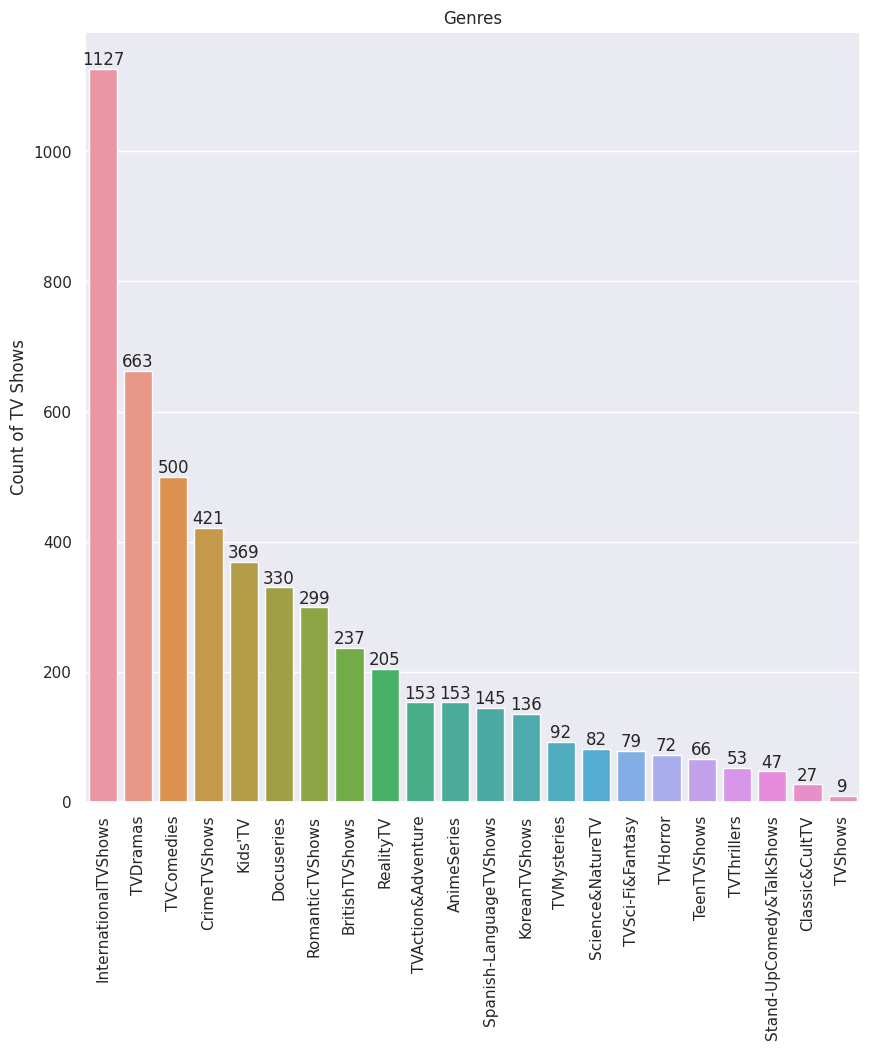

In [45]:
fig = plt.figure(figsize = (10,10))
ax = sns.barplot(x = genre_names, y =  genre_value)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(genre_names, rotation = 90)
ax.set_ylabel('Count of TV Shows')
ax.set_title('Genres');

we can see that internationaltv shows has the most number of count

Analysis and duration of the series

In [46]:
durations[c]

,title,no_of_season
1,Blood & Water,2
4,Kota Factory,2
8,The Great British Baking Show,9
15,Dear White People,4
17,Falsa identidad,2
...,...,...
8780,Yo-Kai Watch,1
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3


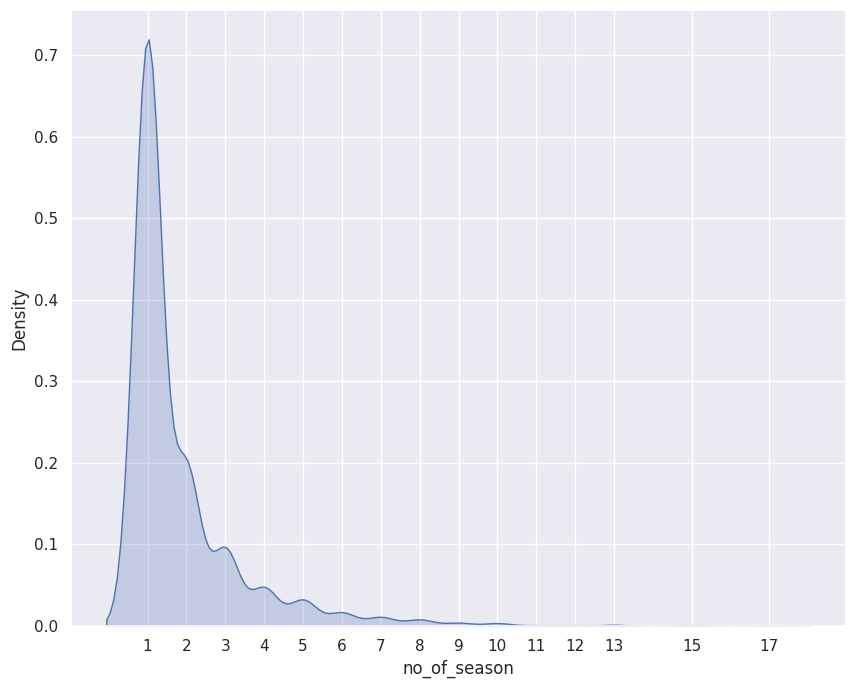

In [47]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,8))
sns.kdeplot(data = durations['no_of_season'], shade = True)
plt.xticks(sorted(durations['no_of_season'].unique()));
